# The first part of the assignment requires you to perform multivariate regression to estimate the pricing of house using the availability facility information as features.

**A peek into the dataset :**

 The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.


 Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables.

In [1]:
!pip install scikit-learn==1.0.2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

from sklearn.datasets import load_boston
import seaborn as sns

In [3]:
# Load the dataset by calling the load_boston function
boston = load_boston() # Fill

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [4]:
# Find the keys of all features in the dataset
feature_names = boston.feature_names
print("Feature Names:", feature_names)


Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Find the type of the data
data = boston.data
data_type = type(data)
print("Data Type:", data_type)

Data Type: <class 'numpy.ndarray'>


In [6]:
# Find the shape of the data
data_shape = data.shape
print("Data Shape:", data_shape)



Data Shape: (506, 13)


In [7]:
# Load the data into a pandas dataframe
data_df = pd.DataFrame(data=data, columns=boston.feature_names)

# Print the head of the dataframe to see how it is
print(data_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
# sklearn datasets have the y value as boston.target. Load the y values as a new column data_df['PRICE']
data_df['PRICE'] = boston.target

# Print the updated dataframe
print(data_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [9]:
# Visualize the data frame using the .describe() function
data_summary = data_df.describe()
print(data_summary)


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [10]:
# Visualize the data frame using the .info() function
data_info = data_df.info()
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_df.drop("PRICE", axis=1)  # Features (all columns except 'PRICE')
y = data_df["PRICE"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()


In [13]:
# Fit the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict the y values corresponding to test x values
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error

# Find the MSE error between the test y values and predicted y values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 24.291119474973485


# Second Part : Implementing Logistic Regression

Here you will have to implement a model to predict if a person will buy a product or not given their age.

In [16]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [17]:
# Download the dataset
# Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
!wget "https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download" -O data.csv -q

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


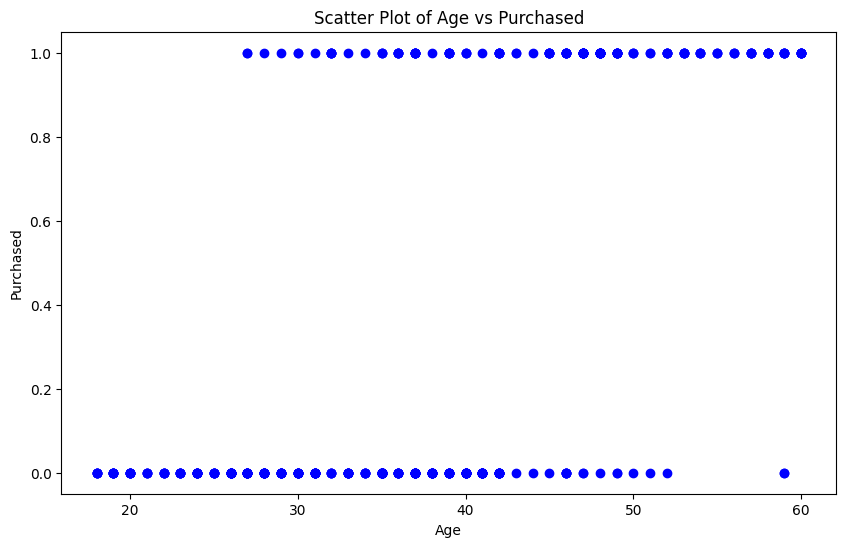

In [18]:
# Load the dataset using read_csv function
data = pd.read_csv("data.csv")

# Display the first few rows of the dataset
print(data.head())

# Visualize the dataset
plt.scatter(data['Age'], data['Purchased'], color='blue')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Scatter Plot of Age vs Purchased')
plt.show()


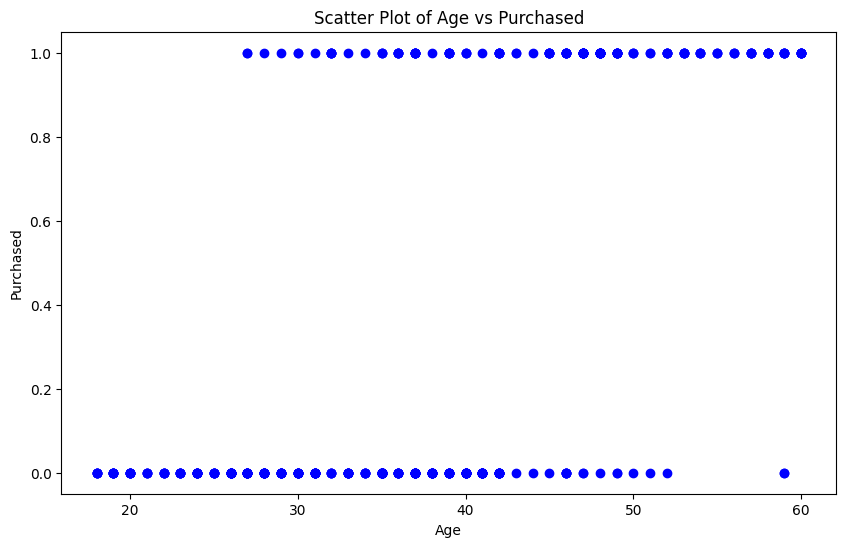

In [19]:
# Scatter plot of Age vs Purchased
plt.scatter(data['Age'], data['Purchased'], color='blue')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Scatter Plot of Age vs Purchased')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data[['Age']]  # Features (only the 'Age' column)
y = data['Purchased']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Import the logistic regression model from sklearn and initialize it
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression()


In [24]:
# Fit the model using the training samples

logreg_model.fit(X_train, y_train)


LogisticRegression()

In [26]:
# Predict the y values for test_x values
y_pred = logreg_model.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9125
